In [2]:
%matplotlib inline


# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st
from datetime import datetime
from collections import Counter


from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse


# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

In [3]:
now = datetime.now()
now

datetime.datetime(2015, 11, 24, 16, 24, 26, 447550)

In [1]:
now.year, now.month, now.day

In [5]:
dt = timedelta(5)
datetime.now() + dt

datetime.datetime(2015, 11, 29, 16, 24, 43, 432877)

## Explicit time formating

In [ ]:
# Functions to convert datetimes to strings
time = datetime.now()
str(time)

In [ ]:
# Get just the date
time.strftime('%Y-%m-%d')

In [ ]:
# Going back to datetime
stime = time.strftime('%Y-%m-%d')
datetime.strptime(stime,'%Y-%m-%d')

## Time parser function

In [ ]:
parse(stime)

In [ ]:
# the parser will work with lots of text
parse('Nov 24, 2015, 3:30 pm')

## Working with time series

In [9]:
lb = pd.read_csv("/Users/RustyRosti/MSDS/Fall/DS_6001/time_series/LiveBirths.txt")
months = pd.date_range('1/1948', '2/1979', freq = 'M')
livebirths = pd.Series(lb["Births"].values, index = months)

In [ ]:
#indexing
print(livebirths[2])
print(livebirths['1948-3-31'])

In [11]:
# more indexing
livebirths["1950"]

1950-01-31    297
1950-02-28    273
1950-03-31    294
1950-04-30    259
1950-05-31    276
1950-06-30    294
1950-07-31    316
1950-08-31    325
1950-09-30    315
1950-10-31    312
1950-11-30    292
1950-12-31    301
Freq: M, dtype: int64

In [12]:
#Fills in the days
lb_days = livebirths.resample('D', fill_method = 'ffill')

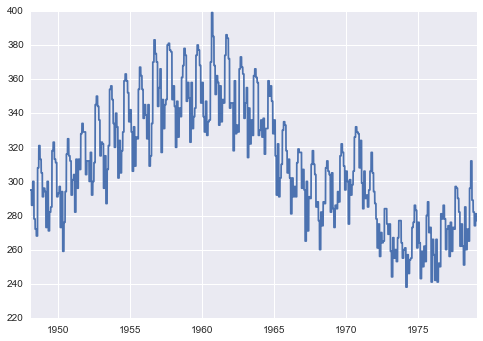

In [13]:
lb_days.plot()

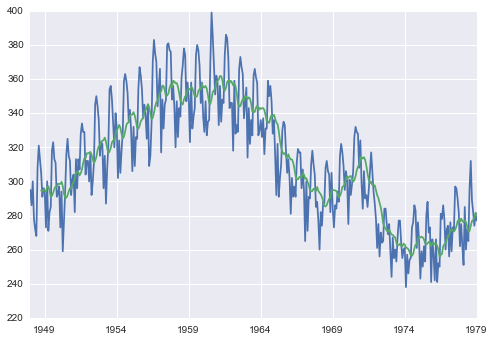

In [14]:
livebirths.plot()
pd.rolling_mean(livebirths, 10).plot()

In [ ]:
fig = plt.figure()
ts = fig.add_subplot(1, 1, 1)
ts.plot(livebirths, 'b', label = 'Live Births')
ts.plot(pd.rolling_mean(livebirths, 10),'g', label = 'Rolling Mean')
ts.legend(loc = 'best')
ts.set_title("U.S. Live Births")
ts.set_ylabel("No. of Births")
ts.set_xlabel("Years")

In [ ]:
ig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))


ma10 = pd.rolling_mean(livebirths, 10)
ewma10 = pd.ewma(livebirths, span=10)

livebirths.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
livebirths.plot(style='k-', ax=axes[1])
ewma10.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')